## Exploratory analysis

### Import libraries

In [30]:
# import dependencies
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator


from steam import Steam
from dotenv import load_dotenv
import os

### Load data and Steam API key

In [31]:
# Get the Steam Web API key
load_dotenv('../.env')
KEY = os.getenv('STEAM_API_KEY')
steam = Steam(KEY)

# Load the data
df = pd.read_csv("../data/interim/games_playtimes.csv")
df

,Owner,Game ID,Game name:,Hours Played
0,76561198327134117,570,Dota 2,14056.433333
1,76561198327133163,570,Dota 2,5682.566667
2,76561198327134560,570,Dota 2,5635.966667
3,76561198327134471,346110,ARK: Survival Evolved,5385.716667
4,76561198327130488,570,Dota 2,4895.966667
...,...,...,...,...
10560,76561198327130361,548430,Deep Rock Galactic,1.000000
10561,76561198327134397,652980,Loading Screen Simulator,1.000000
10562,76561198327130105,1245620,ELDEN RING,1.000000
10563,76561198327135822,1241100,POLYGON,1.000000


### Top 10 most played games/most popular games

In [32]:
# Drop duplicate game names, keeping only the first occurrence (so the most played one)
df_unique = df.drop_duplicates(subset='Game name:')
df_unique

,Owner,Game ID,Game name:,Hours Played
0,76561198327134117,570,Dota 2,14056.433333
3,76561198327134471,346110,ARK: Survival Evolved,5385.716667
5,76561198327135462,440,Team Fortress 2,4501.666667
7,76561198327131777,10190,Call of Duty®: Modern Warfare® 2 (2009),4025.883333
8,76561198327135060,252490,Rust,3925.216667
...,...,...,...,...
10546,76561198327135355,939600,LOVE³ -Love Cube-,1.000000
10547,76561198327131530,1088590,love love love,1.000000
10548,76561198327133163,842150,Wild West Saga: Idle Tycoon Clicker,1.000000
10559,76561198327129304,395200,Ben and Ed,1.000000


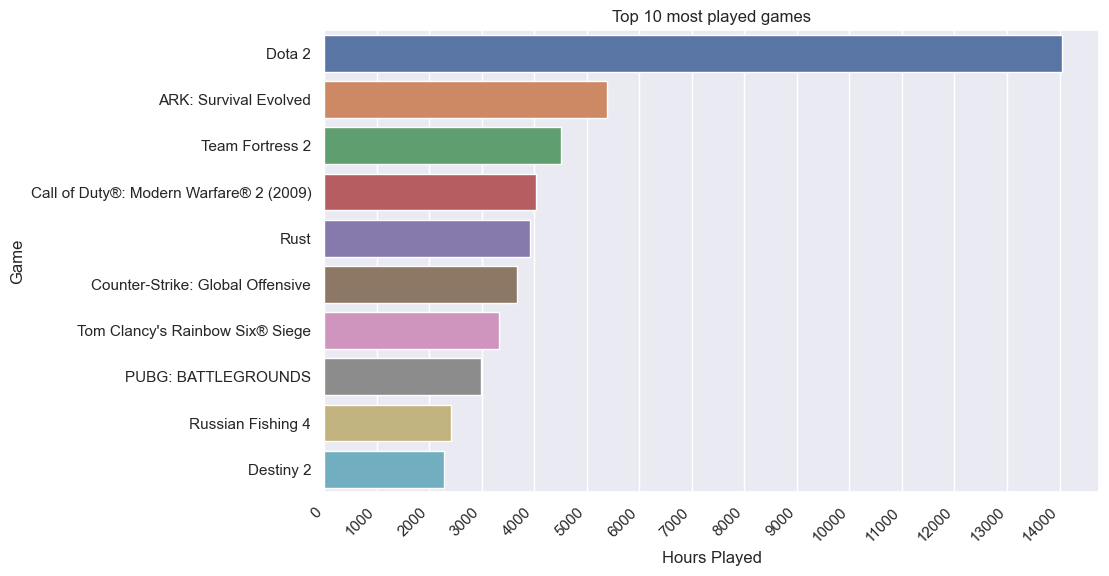

In [33]:
# Set the style of the plot
sns.set(style="darkgrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_unique.head(10), x='Hours Played', y='Game name:')
plt.xlabel('Hours Played')
plt.ylabel('Game')
plt.title('Top 10 most played games')

# Increase the number of ticks on the x-axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=15))  # Adjust the number of ticks (change nbins=10 to desired number)

# Customize the x-axis tick rotation
plt.xticks(rotation=45, ha='right')

plt.savefig('../reports/figures/top_10_played.png', dpi=300, bbox_inches='tight')  # Save the plot

plt.show()

### Most popular games

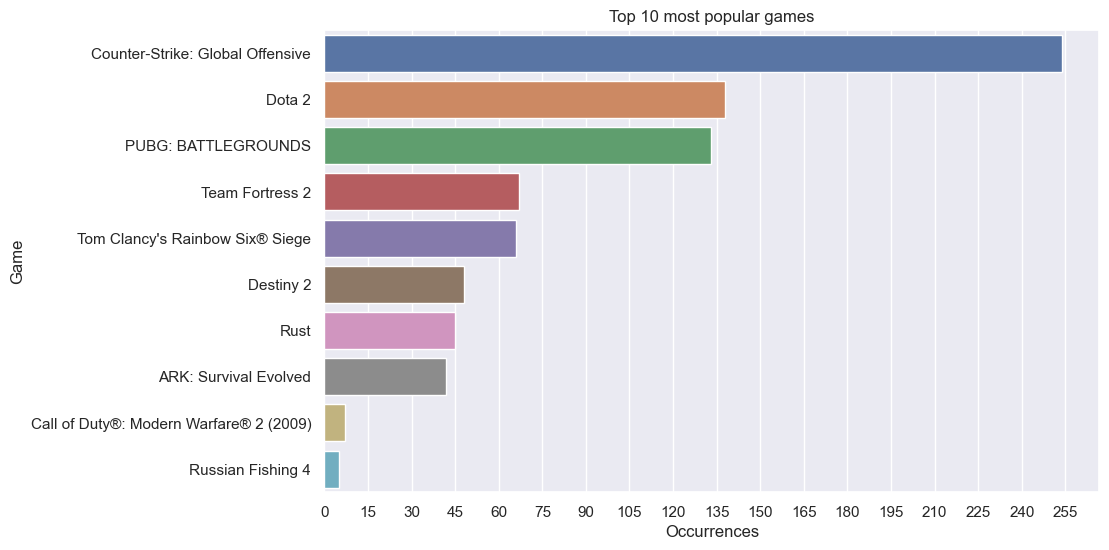

In [34]:
# Get the names of the top 10 games
game_names = df_unique.head(10)['Game name:'].tolist()

# Filter the full dataset based on the game names
filtered_df = df[df['Game name:'].isin(game_names)]

# Count the occurrences of each game name
occurrences = filtered_df['Game name:'].value_counts()

# Set the style of the plot
sns.set(style="darkgrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=occurrences.values, y=occurrences.index)
plt.xlabel('Occurrences')
plt.ylabel('Game')
plt.title('Top 10 most popular games')

# Increase the number of ticks on the x-axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust the number of ticks (change nbins=10 to desired number)

plt.savefig('../reports/figures/top_10_popular.png', dpi=300, bbox_inches='tight')  # Save the plot

plt.show()